[SMART BETA] Size Factor 소형주 팩터
====================

## 1. 소형주 효과
주식시장에서 소형주로 분리되는 주식들(시가총액 기준 상대적으로 규모가 작은 종목)은 일반적으로 대형주 주식보다 장기적인 수익률이 높다는 것이 *소형주 효과*이다. 최초로 밝혀진 논문은 ROLL W. Banz의 [**논문**](https://www.sciencedirect.com/science/article/pii/0304405X81900180)에서 밝혀진 이후, Fama-French의 팩터 모델에 대한 논문에 의해 널리 알려지게 되었다.

일반적으로 소형주가 대형주에 비하여 초과 수익률을 가지는 이유는 시장 참여자가 대부분 개인투자자이고 이로 인하여 발생하는 발생하는 정보의 부족이 *비효율적*으로 시장을 만듬으로 인해 체계적인 위험에 기인하여 반영되는 *'risk premium'*으로 인한 것이라고 대부분의 책들은 설명한다.

그렇다면 이러한 소형주 효과 현재 금융시장에서도 유효한가를 논하자면 여러 의문이 제기되는 실정이다.

## 1.1 SMB를 통한 소형주 효과의 검증

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SMB = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\각 지역별 SMB 펙터 누적 수익률.xlsx', index_col=0)
SMB.head()

,Global,Global ex US,Europe,Japan,Asia ex Japan
199007,0.77,2.77,0.48,6.01,-2.98
199008,-1.60,-0.92,-0.12,-4.98,2.99
199009,1.23,3.21,1.75,0.75,4.12
199010,-7.39,-8.98,-2.76,1.23,-5.04
199011,1.22,1.17,-2.75,-5.48,-1.62


위 *Python* 코드를 통해서 불러온 데이터를 이용하여 소형주 효과의 유효성을 검증하도록 해보자. 사용된 데이터는 5개 지역의 SMB factor 누적 수익률이다. 

[데이터 출처](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) - *Fama/French Factors *

In [2]:
SMB_Cum_ret = np.cumprod(SMB/100+1)-1
SMB_Cum_ret.tail()

,Global,Global ex US,Europe,Japan,Asia ex Japan
201710,0.048795,0.068222,-0.065510,0.040166,-0.599847
201711,0.041663,0.068435,-0.069248,0.040686,-0.606610
201712,0.051455,0.087453,-0.054635,0.061396,-0.602636
201801,0.040204,0.089193,-0.047072,0.078484,-0.609431
201802,0.048630,0.103135,-0.035446,0.089700,-0.611111


numpy 라이브러리에 포함된 cumprod 함수를 사용하면 누적 수익률을 쉽게 구할 수 있다.

In [3]:
def cum_plot(data, title):
    plt.figure(figsize=(20,7))
    plt.plot(data.values, )
    plt.title(title)
    plt.axhline(color = 'k')
    plt.xticks([0, 36, 72, 108, 144, 180, 216, 252, 288, 324, 360],['1990','1993','1996','1999','2002','2005','2008','2011','2014','2017'])

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.legend(data.columns.values)

    plt.show()

일반 *matplotlib.pyplot* 라이브러리에서 확인하고 싶은 그래프를 그릴 수 있도록 *function*을 구성하여 SMB 펙터에 대하여 plotting 하자.

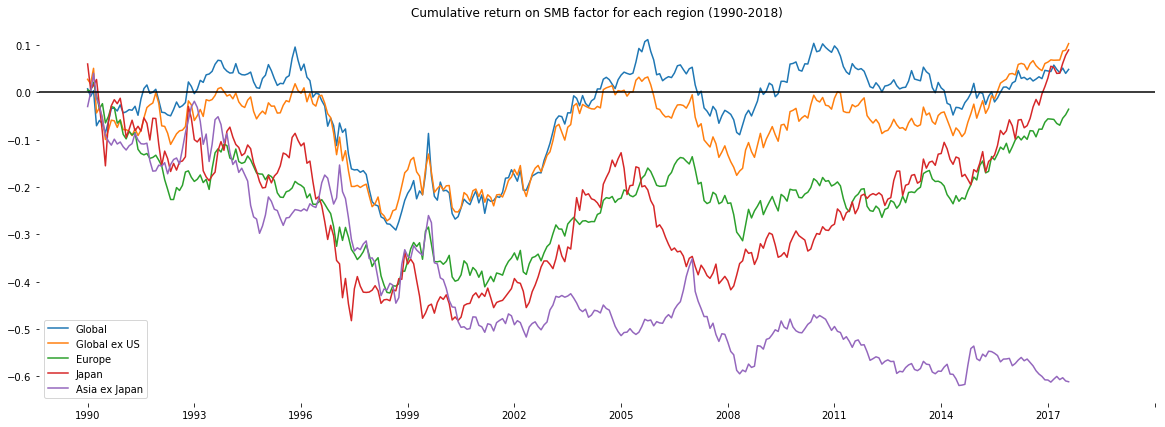

In [4]:
cum_plot(SMB_Cum_ret, 'Cumulative return on SMB factor for each region (1990-2018)')

위에서 구한 누적 수익률을 통하여 얻은 데이터를 matplotlib.pyplot 라이브러리 함수를 통하여 보기 쉽게 plotting 할 수 있다.

위 그래프를 통해서 SMB 펙터의 누적 수익률 추이를 확인해보면 모든 지역에서 SMB 펙터의 수익률이 상승한다는 증거를 제시하기 어렵다고 판단될 정도로 낮은 수익률 상승폭을 보이고 있다. 심지어, 일본을 제외한 아시아 지역의 추이를 살펴보면 음의 수익률을 보이고 있다.

그래프를 plotting 함으로써 알 수 있는 사실은 소형주 효과에 대한 설득력은 위에서 볼 수 있듯이 상당히 낮다는 것이다.

## 2. 여러 Factor를 통한 소형주 효과 분석

그렇다면 위 SMB 펙터를 사용하여 plotting한 것처럼 과연 실제로 소형주 효과는 사라졌다고 말할 수 있는 것인가?

Cifford s. Asness와 Andrea Frazzini의 2014년 [**논문**](http://www.econ.yale.edu/~shiller/behfin/2013_04-10/asness-frazzini-pedersen.pdf)을 보면 *QMJ(Quality Minus Junk)*펙터를 통해서 소형주 효과가 유효할 수 있다는 가능성을 보였다.

이는 해당 펙터의 핵심 구성인 수익성 펙터내에서 소형주 효과를 확인 할 수 있다는 가능성을 내포하는 것으로 RMW 펙터의 OP펙터를 통해서 소형주와 대형주로 구분된 *소형 RMW - 대형 RMW* 계산을 통해 소형주 효과를 설명할 수 있는 것이다.

### 2.1 RMW Factor 분석

첫번째로 제시되는 Fama-French의 5 Factor 중 하나는 RMW 팩터이다. 팩터에 사용되는 Operatinng Profitability 팩터에서 소형과 대형으로 구분하여 소형, 대형, 각각의 RMW를 계산하여 확인 할 수 있다.

In [5]:
Global_RMW_cap = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\시가총액가중 기준 소형 RMW - 대형 RMW.xlsx', index_col=0, sheetname='Global')
GlobalexUS_RMW_cap = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\시가총액가중 기준 소형 RMW - 대형 RMW.xlsx', index_col=0, sheetname='Global ex US')
Europe_RMW_cap = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\시가총액가중 기준 소형 RMW - 대형 RMW.xlsx', index_col=0, sheetname='Europe')
Japan_RMW_cap = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\시가총액가중 기준 소형 RMW - 대형 RMW.xlsx', index_col=0, sheetname='Japan')
AsiaexJapan_RMW_cap = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\시가총액가중 기준 소형 RMW - 대형 RMW.xlsx', index_col=0, sheetname='Asia ex Japan')

Global_RMW_cap.tail()

,SMALL LoOP,SMALL HiOP,BIG LoOP,BIG HiOP
201710,0.75,1.77,1.04,1.91
201711,1.02,1.65,1.06,3.28
201712,2.38,2.94,1.77,1.54
201801,4.42,4.19,5.63,5.13
201802,-3.41,-2.44,-4.71,-3.71


[데이터 출처](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) - *6 Portfolios Formed on Size and Operating Profitability*

In [6]:
def smallRMW_bigRMW_maker(data1, data2, data3, data4, data5):
    smallRMW_bigRMW = pd.DataFrame()

    smallRMW_bigRMW['Global'] = (data1['SMALL HiOP']-data1['SMALL LoOP'])-(data1['BIG HiOP']-data1['BIG LoOP'])
    smallRMW_bigRMW['Global ex US'] = (data2['SMALL HiOP']-data2['SMALL LoOP'])-(data2['BIG HiOP']-data2['BIG LoOP'])
    smallRMW_bigRMW['Europe'] = (data3['SMALL HiOP']-data3['SMALL LoOP'])-(data3['BIG HiOP']-data3['BIG LoOP'])
    smallRMW_bigRMW['Japan'] = (data4['SMALL HiOP']-data4['SMALL LoOP'])-(data4['BIG HiOP']-data4['BIG LoOP'])
    smallRMW_bigRMW['Asia ex Japan'] = (data5['SMALL HiOP']-data5['SMALL LoOP'])-(data5['BIG HiOP']-data5['BIG LoOP'])
    
    return smallRMW_bigRMW

각 지역별 OP 팩터의 수익률을 나타내는 DataFrame을 위 함수를 통해 가공하여 지역별 RMW를 구한다.

In [7]:
smallRMW_bigRMW_cap = smallRMW_bigRMW_maker(Global_RMW_cap, GlobalexUS_RMW_cap, Europe_RMW_cap, Japan_RMW_cap, AsiaexJapan_RMW_cap)
smallRMW_bigRMW_cap.tail()

,Global,Global ex US,Europe,Japan,Asia ex Japan
201710,0.15,-0.50,-0.52,1.19,1.16
201711,-1.59,0.66,-1.43,1.77,-0.10
201712,0.79,1.44,0.26,4.12,1.13
201801,0.27,1.36,-0.74,3.08,3.43
201802,-0.03,1.35,0.99,3.01,-1.30


In [8]:
smallRMW_bigRMW_cap_Cum_ret = np.cumprod(smallRMW_bigRMW_cap/100+1)-1

누적 수익률 또한 SMB를 구할 때와 동일한 방식으로 누적 수익률을 계산해 줍니다.

In [9]:
smallRMW_bigRMW_cap_Cum_ret.tail()

,Global,Global ex US,Europe,Japan,Asia ex Japan
201710,0.183771,0.769602,1.478557,-0.179649,1.138570
201711,0.164949,0.781281,1.443114,-0.165129,1.136431
201712,0.174152,0.806932,1.449466,-0.130732,1.160573
201801,0.177322,0.831506,1.431340,-0.103959,1.234680
201802,0.176969,0.856231,1.455410,-0.076988,1.205629


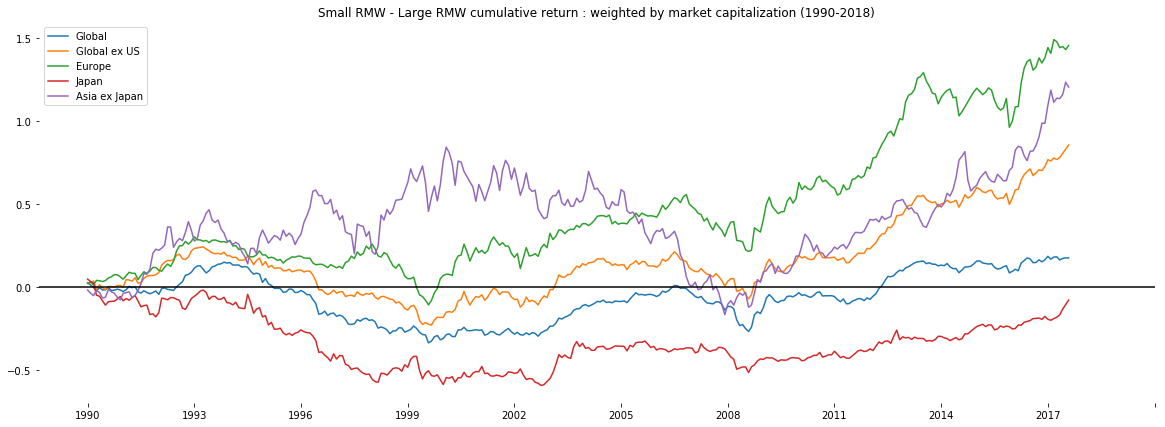

In [10]:
cum_plot(smallRMW_bigRMW_cap_Cum_ret, 'Small RMW - Large RMW cumulative return : weighted by market capitalization (1990-2018)')

RMW Factor의 결과값을 확인하면 Japan과 Global의 경우에는 비교적 낮은 수익률을 기록하였지만 그 중 Global의 경우에는 이전 SMB 팩터에 비하여 높은 수익률을 보이고 있으며 나머지 3개 지역에서의 누적수익률이 단순 SMB와 비교하였을 때 상당히 *높은 수익률 개선*이 존재하는 것을 확인 할 수 있습니다.

동일하게 RMW 팩터를 동일가중 기준으로 누적 수익률을 구하는 경우도 그래프를 그려보면

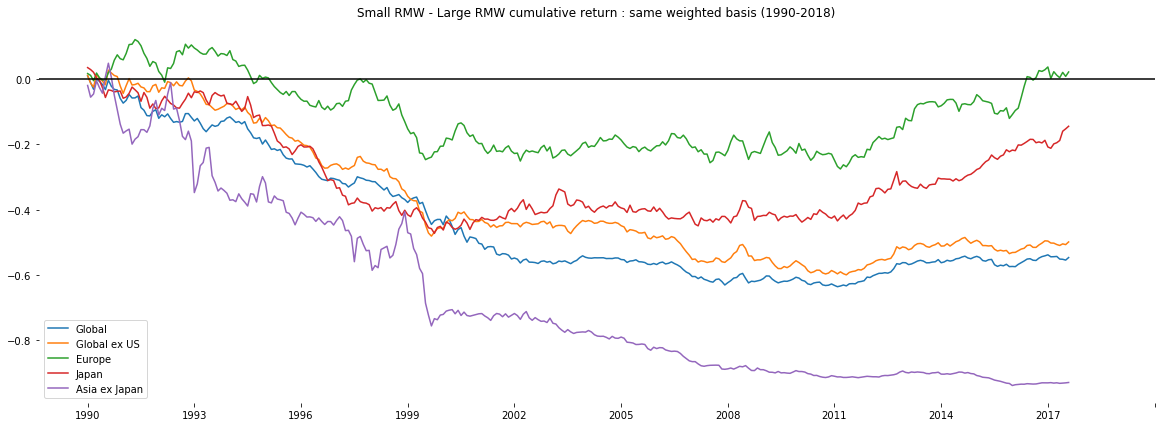

In [11]:
Global_RMW_eq = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\동일가중 기준 소형 RMW - 대형 RMW.xlsx', index_col=0, sheetname='Global')
GlobalexUS_RMW_eq = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\동일가중 기준 소형 RMW - 대형 RMW.xlsx', index_col=0, sheetname='Global ex US')
Europe_RMW_eq = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\동일가중 기준 소형 RMW - 대형 RMW.xlsx', index_col=0, sheetname='Europe')
Japan_RMW_eq = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\동일가중 기준 소형 RMW - 대형 RMW.xlsx', index_col=0, sheetname='Japan')
AsiaexJapan_RMW_eq = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\동일가중 기준 소형 RMW - 대형 RMW.xlsx', index_col=0, sheetname='Asia ex Japan')

smallRMW_bigRMW_eq = smallRMW_bigRMW_maker(Global_RMW_eq, GlobalexUS_RMW_eq, Europe_RMW_eq, Japan_RMW_eq, AsiaexJapan_RMW_eq)

smallRMW_bigRMW_eq_Cum_ret = np.cumprod(smallRMW_bigRMW_eq/100+1)-1

cum_plot(smallRMW_bigRMW_eq_Cum_ret, 'Small RMW - Large RMW cumulative return : same weighted basis (1990-2018)')

다음과 같이 나오는 것을 알 수 있는데 이 경우에는 뭐가 문제지...

### 2.2 HML Factor 분석

HML 팩터의 경우에도 앞에 2.1에서 RMW 팩터에서 사용한 방법과 동일한 방법으로 소형주 효과를 보여줄 수 있습니다.

In [12]:
Global_HML_cap = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\시가총액가중 기준 소형 HML - 대형 HML.xlsx', index_col=0, sheetname='Global')
GlobalexUS_HML_cap = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\시가총액가중 기준 소형 HML - 대형 HML.xlsx', index_col=0, sheetname='Global ex US')
Europe_HML_cap = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\시가총액가중 기준 소형 HML - 대형 HML.xlsx', index_col=0, sheetname='Europe')
Japan_HML_cap = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\시가총액가중 기준 소형 HML - 대형 HML.xlsx', index_col=0, sheetname='Japan')
AsiaexJapan_HML_cap = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\시가총액가중 기준 소형 HML - 대형 HML.xlsx', index_col=0, sheetname='Asia ex Japan')

In [13]:
def smallHML_bigHML_maker(data1, data2, data3, data4, data5):
    smallHML_bigHML = pd.DataFrame()

    smallHML_bigHML['Global'] = (data1['SMALL HiBM']-data1['SMALL LoBM'])-(data1['BIG HiBM']-data1['BIG LoBM'])
    smallHML_bigHML['Global ex US'] = (data2['SMALL HiBM']-data2['SMALL LoBM'])-(data2['BIG HiBM']-data2['BIG LoBM'])
    smallHML_bigHML['Europe'] = (data3['SMALL HiBM']-data3['SMALL LoBM'])-(data3['BIG HiBM']-data3['BIG LoBM'])
    smallHML_bigHML['Japan'] = (data4['SMALL HiBM']-data4['SMALL LoBM'])-(data4['BIG HiBM']-data4['BIG LoBM'])
    smallHML_bigHML['Asia ex Japan'] = (data5['SMALL HiBM']-data5['SMALL LoBM'])-(data5['BIG HiBM']-data5['BIG LoBM'])
    
    return smallHML_bigHML

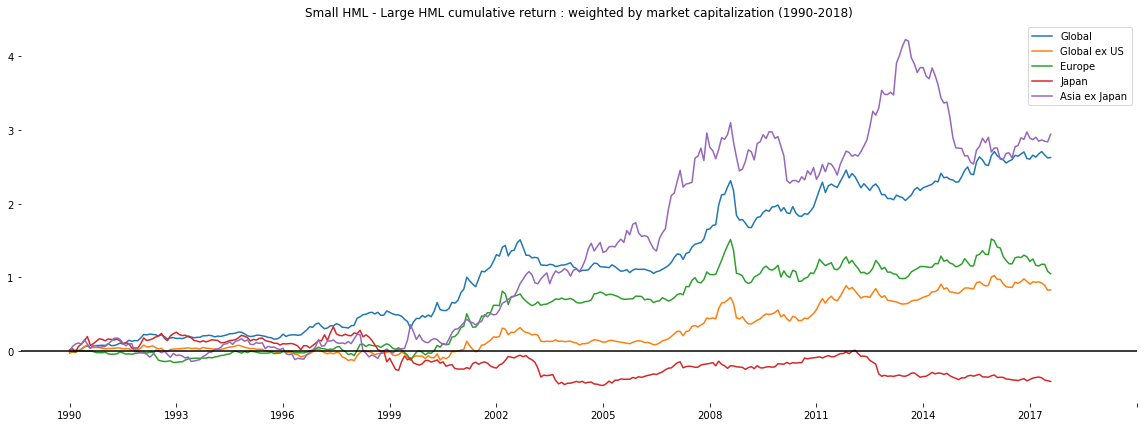

In [14]:
smallHML_bigHML_cap = smallHML_bigHML_maker(Global_HML_cap, GlobalexUS_HML_cap, Europe_HML_cap, Japan_HML_cap, AsiaexJapan_HML_cap)

smallHML_bigHML_cap_Cum_ret = np.cumprod(smallHML_bigHML_cap/100+1)-1

cum_plot(smallHML_bigHML_cap_Cum_ret, 'Small HML - Large HML cumulative return : weighted by market capitalization (1990-2018)')

HML 팩터도 RMW와 마찬가지로 시가총액가중 기준을 적용하여 분석하면 Japan을 제외한 나머지 지역에서 소형주 효과를 확인 할 수 있습니다.

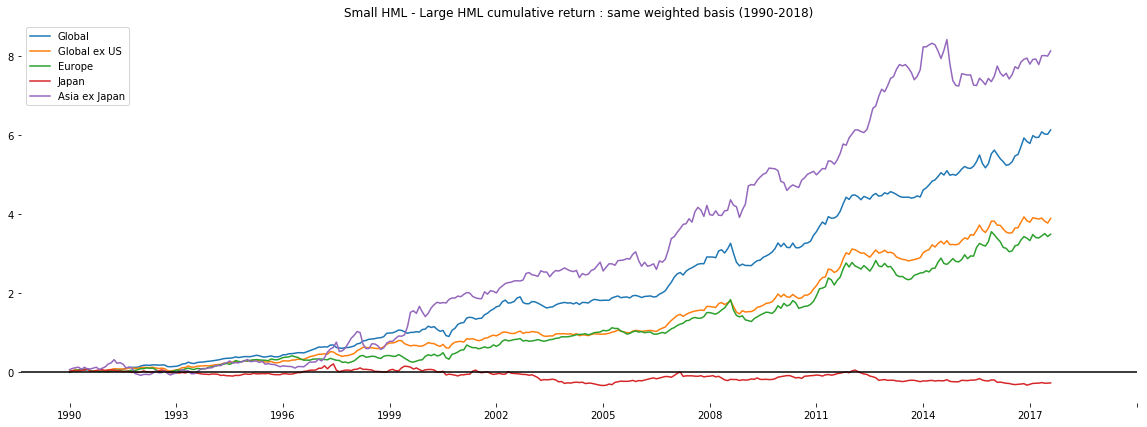

In [15]:
Global_HML_eq = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\동일가중 기준 소형 HML - 대형 HML.xlsx', index_col=0, sheetname='Global')
GlobalexUS_HML_eq = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\동일가중 기준 소형 HML - 대형 HML.xlsx', index_col=0, sheetname='Global ex US')
Europe_HML_eq = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\동일가중 기준 소형 HML - 대형 HML.xlsx', index_col=0, sheetname='Europe')
Japan_HML_eq = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\동일가중 기준 소형 HML - 대형 HML.xlsx', index_col=0, sheetname='Japan')
AsiaexJapan_HML_eq = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\동일가중 기준 소형 HML - 대형 HML.xlsx', index_col=0, sheetname='Asia ex Japan')

smallHML_bigHML_eq = smallHML_bigHML_maker(Global_HML_eq, GlobalexUS_HML_eq, Europe_HML_eq, Japan_HML_eq, AsiaexJapan_HML_eq)

smallHML_bigHML_eq_Cum_ret = np.cumprod(smallHML_bigHML_eq/100+1)-1

cum_plot(smallHML_bigHML_eq_Cum_ret, 'Small HML - Large HML cumulative return : same weighted basis (1990-2018)')

동일가중 기준으로 HML 팩터를 분석하여도 역시 소형주 효과를 확인하는 것이 가능합니다.


[데이터 출처](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) - *6 Portfolios Formed on Size and Book-to-Market*

### 2.3 CMA Factor 분석

마지막으로 분석할 Fama-French의 5-Factor 중 CMA 팩터를 확인해보도록 하겠습니다.

In [16]:
Global_CMA_cap = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\시가총액가중 기준 소형 CMA - 대형 CMA.xlsx', index_col=0, sheetname='Global')
GlobalexUS_CMA_cap = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\시가총액가중 기준 소형 CMA - 대형 CMA.xlsx', index_col=0, sheetname='Global ex US')
Europe_CMA_cap = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\시가총액가중 기준 소형 CMA - 대형 CMA.xlsx', index_col=0, sheetname='Europe')
Japan_CMA_cap = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\시가총액가중 기준 소형 CMA - 대형 CMA.xlsx', index_col=0, sheetname='Japan')
AsiaexJapan_CMA_cap = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\시가총액가중 기준 소형 CMA - 대형 CMA.xlsx', index_col=0, sheetname='Asia ex Japan')

In [17]:
def smallCMA_bigCMA_maker(data1, data2, data3, data4, data5):
    smallCMA_bigCMA = pd.DataFrame()

    smallCMA_bigCMA['Global'] = (data1['SMALL LoINV']-data1['SMALL HiINV'])-(data1['BIG LoINV']-data1['BIG HiINV'])
    smallCMA_bigCMA['Global ex US'] = (data2['SMALL LoINV']-data2['SMALL HiINV'])-(data2['BIG LoINV']-data2['BIG HiINV'])
    smallCMA_bigCMA['Europe'] = (data3['SMALL LoINV']-data3['SMALL HiINV'])-(data3['BIG LoINV']-data3['BIG HiINV'])
    smallCMA_bigCMA['Japan'] = (data4['SMALL LoINV']-data4['SMALL HiINV'])-(data4['BIG LoINV']-data4['BIG HiINV'])
    smallCMA_bigCMA['Asia ex Japan'] = (data5['SMALL LoINV']-data5['SMALL HiINV'])-(data5['BIG LoINV']-data5['BIG HiINV'])
    
    return smallCMA_bigCMA

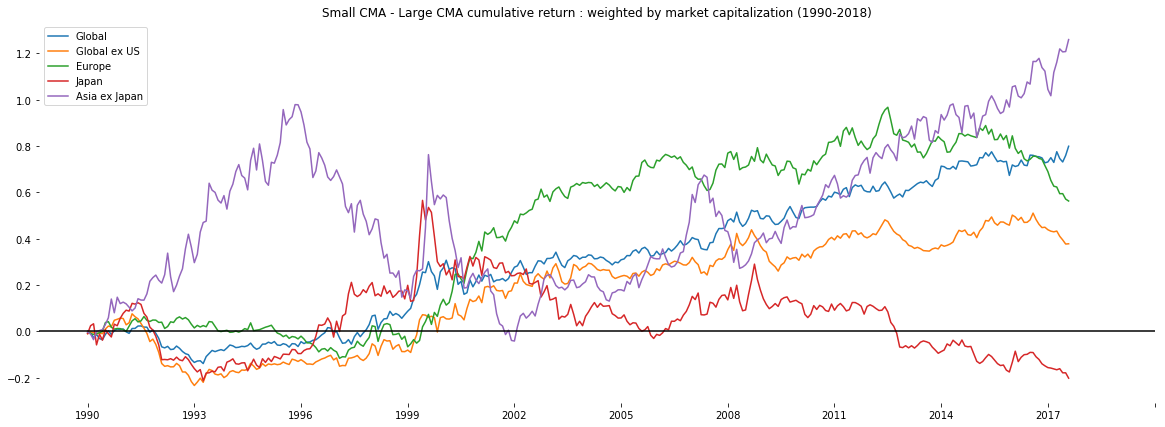

In [18]:
smallCMA_bigCMA_cap = smallCMA_bigCMA_maker(Global_CMA_cap, GlobalexUS_CMA_cap, Europe_CMA_cap, Japan_CMA_cap, AsiaexJapan_CMA_cap)

smallCMA_bigCMA_cap_Cum_ret = np.cumprod(smallCMA_bigCMA_cap/100+1)-1

cum_plot(smallCMA_bigCMA_cap_Cum_ret, 'Small CMA - Large CMA cumulative return : weighted by market capitalization (1990-2018)')

앞의 다른 팩터들과 동일한 방법으로 CMA 팩터를 plotting 하면, 대부분의 지역에서 SMB 팩터에서 보여주는 것에 비해 상승한 소형주 효과를 볼 수 있습니다.

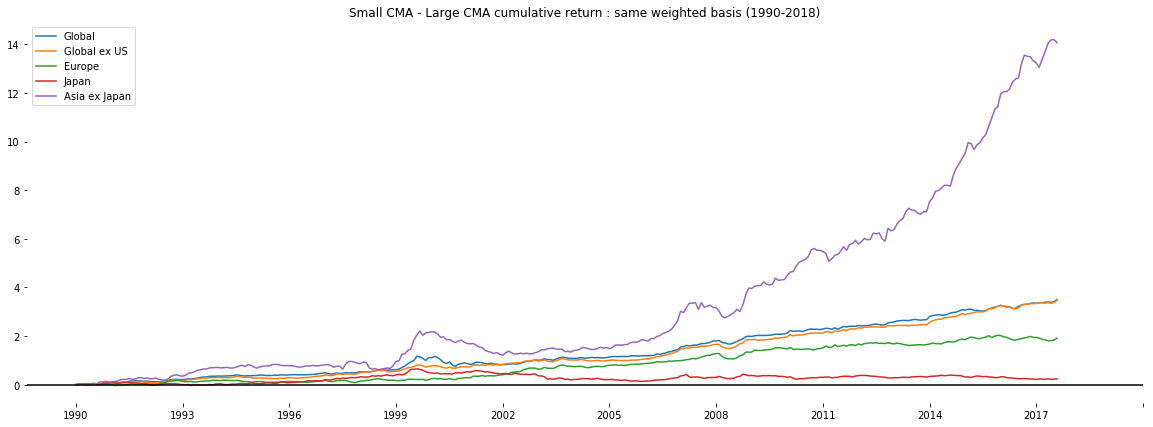

In [19]:
Global_CMA_eq = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\동일가중 기준 소형 CMA - 대형 CMA.xlsx', index_col=0, sheetname='Global')
GlobalexUS_CMA_eq = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\동일가중 기준 소형 CMA - 대형 CMA.xlsx', index_col=0, sheetname='Global ex US')
Europe_CMA_eq = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\동일가중 기준 소형 CMA - 대형 CMA.xlsx', index_col=0, sheetname='Europe')
Japan_CMA_eq = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\동일가중 기준 소형 CMA - 대형 CMA.xlsx', index_col=0, sheetname='Japan')
AsiaexJapan_CMA_eq = pd.read_excel('D:\\제용\\금융공학 연구실\\18-1학기\\스마트베타\\데이터\\동일가중 기준 소형 CMA - 대형 CMA.xlsx', index_col=0, sheetname='Asia ex Japan')

smallCMA_bigCMA_eq = smallCMA_bigCMA_maker(Global_CMA_eq, GlobalexUS_CMA_eq, Europe_CMA_eq, Japan_CMA_eq, AsiaexJapan_CMA_eq)

smallCMA_bigCMA_eq_Cum_ret = np.cumprod(smallCMA_bigCMA_eq/100+1)-1

cum_plot(smallCMA_bigCMA_eq_Cum_ret, 'Small CMA - Large CMA cumulative return : same weighted basis (1990-2018)')

마지막으로 CMA 팩터의 동일가중 기준 그래프를 확인하면 모든 지역에서 양(+)의 수익률을 보이고 있으며 특히, 일본을 제외한 아시아지역에서는 높은 수익률을 보이는 것을 확인할 수 있습니다.


[데이터 출처](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) - *6 Portfolios Formed on Size and Investment*

## 3. 소형주 효과의 검증

일반적으로 소형주 효과로 알려진 SMB 팩터가 현재는 많은 부분 그 효과가 미미해진 것으로 보일 수 있으나 다른 Fama-French의 5-Factor를 통해서 여타 다른 팩터(RMW, HML, CMA)를 통해서 그 팩터 내에 존재하는 소형주 효과를 확인 할 수 있습니다. 이를 통해 소형주 효과는 사라진 것처럼 보이지만 여전히 존재하는 것을 이해할 수 있습니다.